In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

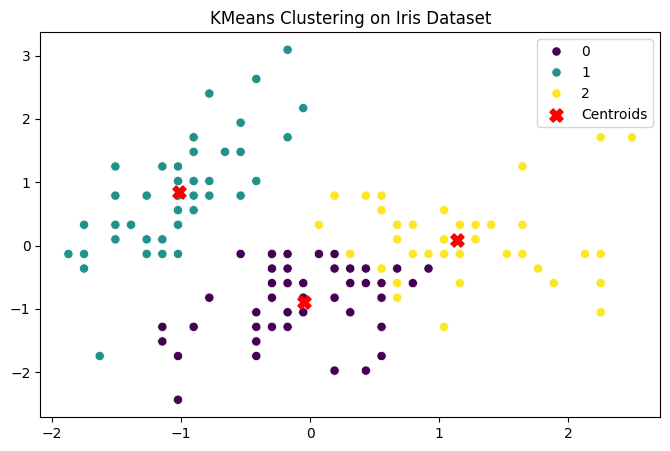

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=45)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=90, label='Centroids')
plt.title('KMeans Clustering on Iris Dataset')
plt.legend()
plt.show()

KMeans is a centroid-based clustering algorithm that partitions data into K clusters by minimizing the variance within each cluster. The process involves:

Initialize K centroids randomly. Assign each data point to the nearest centroid. Recalculate centroids as the mean of all points in a cluster. Repeat steps 2-3 until centroids stop changing significantly (convergence)

Why this alogorithm is suitsble for Iris Dataset?

Natural Clustering Structure: The Iris dataset contains three species (Setosa, Versicolor, Virginica), which naturally form distinct clusters based on flower measurements.

Efficiency: KMeans is computationally efficient for small to medium-sized datasets like Iris (150 samples).

In [6]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

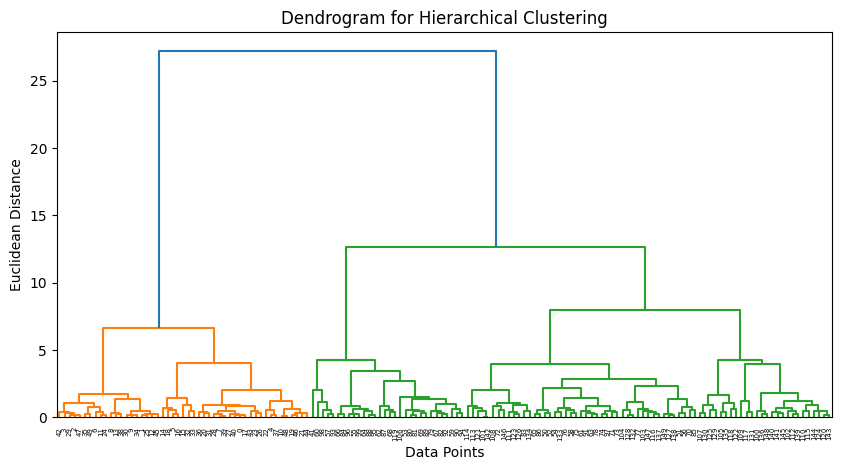

In [7]:
# Dendrogram
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

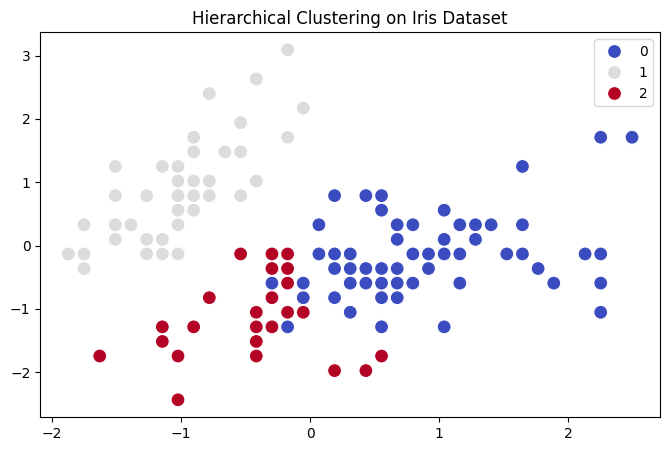

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', s=100)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()

How Hierarchical Clustering Works? Hierarchical clustering builds a tree-like structure (dendrogram) to group data points based on similarity.

Agglomerative (Bottom-Up) (Most Common) Each data point starts as its own cluster. Iteratively, the closest clusters merge until only one cluster remains.

Clusters are formed by cutting the dendrogram at a chosen distance threshold.

Why is Hierarchical Clustering Suitable for the Iris Dataset?

Doesn’t Require K (Predefined Clusters): Unlike KMeans, we don’t need to specify the number of clusters at starting. The dendrogram helps decide the optimal number.

Captures Hierarchical Relationships: The method visually represents how clusters merge, revealing relationships between species.

Effective for Small Datasets: With only 150 samples, Hierarchical clustering runs efficiently and provides interpretable results.